# Import Statements

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from collections import Counter
import pickle
import os

/opt/anaconda3/envs/nlp_project/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download NLTK models
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/anaghar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anaghar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/anaghar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

## Preprocessing functions

In [4]:
def clean_text(text):
    # Lowercase, remove URLs, punctuation, numbers, extra spaces
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def tokenize_and_lemmatize(text):
    # Tokenize and lemmatize while removing stopwords
    tokens = nltk.word_tokenize(text)
    return [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]

def preprocess_text(text):
    return tokenize_and_lemmatize(clean_text(text))

# MLED

## Preprocessing

In [5]:
# Load MELD CSVs
print("Loading the MLED train, val and test datasets.")
meld_train = pd.read_csv("../data/raw/meld_train_dataset.csv")
meld_val = pd.read_csv("../data/raw/meld_val_dataset.csv")
meld_test = pd.read_csv("../data/raw/meld_test_dataset.csv")


Loading the MLED train, val and test datasets.


In [6]:
meld_train.head(5)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [7]:
meld_val.head(5)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, he’s lost it. He’s totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,You’re a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we won’t be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"


In [8]:
meld_test.head(5)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,Why do all you’re coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378"
1,2,Oh. That’s so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385"
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833"


In [9]:
print("Selecting only 'Utterance' and 'Emotion' columns.")
meld_train = meld_train[['Utterance', 'Emotion']]
meld_val   = meld_val[['Utterance', 'Emotion']]
meld_test  = meld_test[['Utterance', 'Emotion']]

Selecting only 'Utterance' and 'Emotion' columns.


In [10]:
# Apply preprocessing
print("Preprocessing the datasets.")
meld_train['tokens'] = meld_train['Utterance'].apply(preprocess_text)
meld_val['tokens'] = meld_val['Utterance'].apply(preprocess_text)
meld_test['tokens'] = meld_test['Utterance'].apply(preprocess_text)

print("Preprocessing datasets completed.")

Preprocessing the datasets.
Preprocessing datasets completed.


## EDA

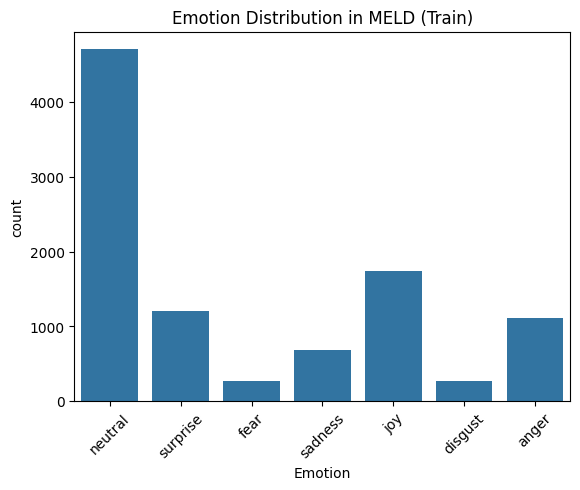

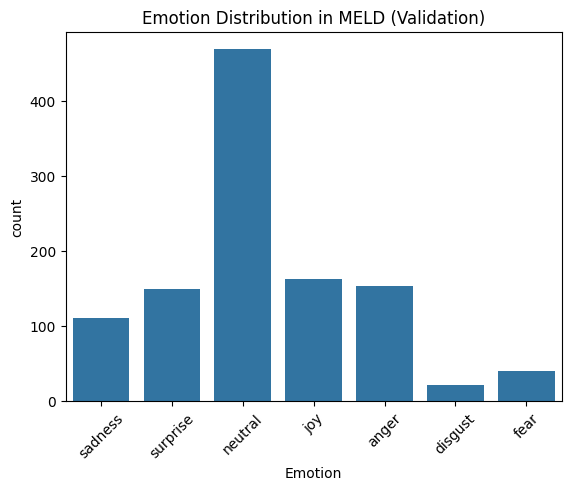

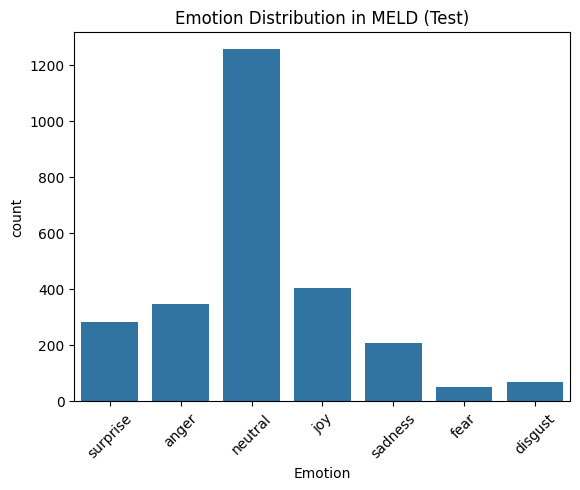

In [11]:
# Train Emotion distribution
sns.countplot(x='Emotion', data=meld_train)
plt.title("Emotion Distribution in MELD (Train)")
plt.xticks(rotation=45)
plt.show()

# Validation Emotion distribution
sns.countplot(x='Emotion', data=meld_val)
plt.title("Emotion Distribution in MELD (Validation)")
plt.xticks(rotation=45)
plt.show()

# TestEmotion distribution
sns.countplot(x='Emotion', data=meld_test)
plt.title("Emotion Distribution in MELD (Test)")
plt.xticks(rotation=45)
plt.show()

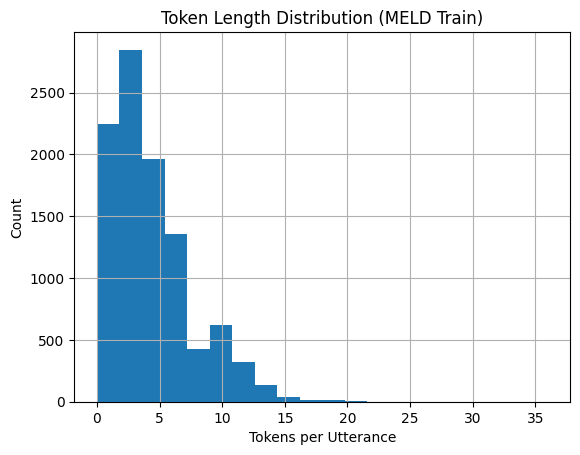

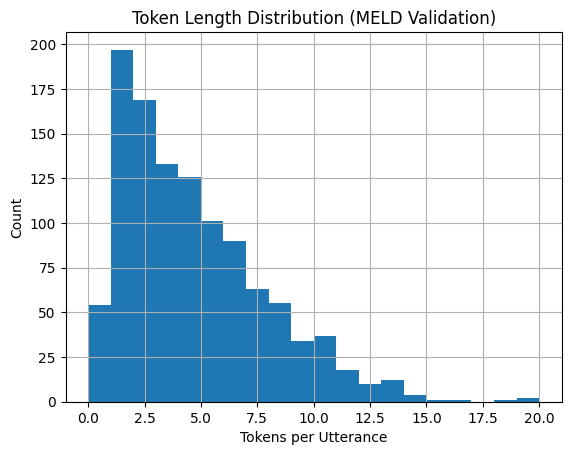

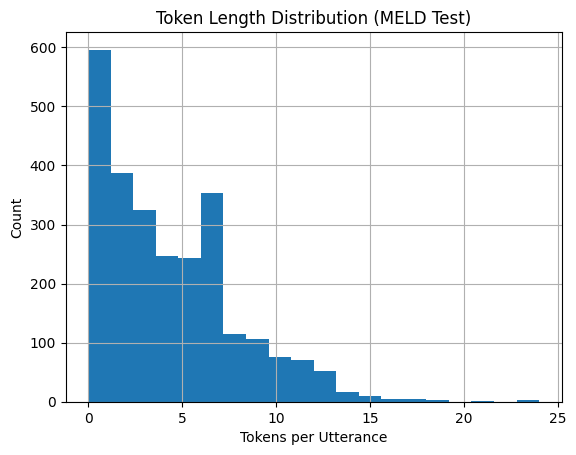

In [12]:
# Train Utterance length distribution
meld_train['token_len'] = meld_train['tokens'].apply(len)
meld_train['token_len'].hist(bins=20)
plt.title("Token Length Distribution (MELD Train)")
plt.xlabel("Tokens per Utterance")
plt.ylabel("Count")
plt.show()

# Validation Utterance length distribution
meld_val['token_len'] = meld_val['tokens'].apply(len)
meld_val['token_len'].hist(bins=20)
plt.title("Token Length Distribution (MELD Validation)")
plt.xlabel("Tokens per Utterance")
plt.ylabel("Count")
plt.show()

# Test Utterance length distribution
meld_test['token_len'] = meld_test['tokens'].apply(len)
meld_test['token_len'].hist(bins=20)
plt.title("Token Length Distribution (MELD Test)")
plt.xlabel("Tokens per Utterance")
plt.ylabel("Count")
plt.show()

In [13]:
meld_train.head(5)

,Utterance,Emotion,tokens,token_len
0,also I was the point person on my company’s tr...,neutral,"[also, point, person, company, transition, kl,...",8
1,You must’ve had your hands full.,neutral,"[mustve, hand, full]",3
2,That I did. That I did.,neutral,[],0
3,So let’s talk a little bit about your duties.,neutral,"[let, talk, little, bit, duty]",5
4,My duties? All right.,surprise,"[duty, right]",2


In [14]:
meld_val.head(5)

,Utterance,Emotion,tokens,token_len
0,"Oh my God, he’s lost it. He’s totally lost it.",sadness,"[oh, god, he, lost, he, totally, lost]",7
1,What?,surprise,[],0
2,"Or! Or, we could go to the bank, close our acc...",neutral,"[could, go, bank, close, account, cut, source]",7
3,You’re a genius!,joy,"[youre, genius]",2
4,"Aww, man, now we won’t be bank buddies!",sadness,"[aww, man, wont, bank, buddy]",5


In [15]:
meld_test.head(5)

,Utterance,Emotion,tokens,token_len
0,Why do all you’re coffee mugs have numbers on ...,surprise,"[youre, coffee, mug, number, bottom]",5
1,Oh. That’s so Monica can keep track. That way ...,anger,"[oh, thats, monica, keep, track, way, one, mis...",11
2,Y'know what?,neutral,[yknow],1
3,"Come on, Lydia, you can do it.",neutral,"[come, lydia]",2
4,Push!,joy,[push],1


#### Saving the data

In [16]:
# Save the preprocessed dataset
os.makedirs("../data/processed", exist_ok=True)

meld_train.to_csv("../data/processed/meld_train_tokenized.csv")
meld_val.to_csv("../data/processed/meld_val_tokenized_meld.csv")
meld_test.to_csv("../data/processed/meld_test_tokenized.csv")

print("MELD Datasets saved as .csv")

meld_train.to_pickle("../data/processed/meld_train_tokenized.pkl")
meld_val.to_pickle("../data/processed/meld_val_tokenized.pkl")
meld_test.to_pickle("../data/processed/meld_test_tokenized.pkl")

print("MELD Datasets saved as .pkl")

MELD Datasets saved as .csv
MELD Datasets saved as .pkl


# DailyDialog

### Preprocessing

In [17]:
def load_and_flatten_dailydialog():
    
    dd_train      = load_dataset("daily_dialog", split="train")
    dd_validation = load_dataset("daily_dialog", split="validation")
    dd_test       = load_dataset("daily_dialog", split="test")

    all_records = []
    for split_name, ds in [
        ("train", dd_train),
        ("validation", dd_validation),
        ("test", dd_test),
    ]:
        for dialog, emos, acts in zip(ds["dialog"], ds["emotion"], ds["act"]):
            for utt, emo, act in zip(dialog, emos, acts):
                all_records.append({
                    "Utterance": utt,
                    "Emotion":   emo,
                    "Act":       act,
                    "Split":     split_name
                })

    df = pd.DataFrame(all_records)
    return df

In [18]:
print("Loading the DailyDialog train, val and test datasets and flattening it.")
dd_df = load_and_flatten_dailydialog()

Loading the DailyDialog train, val and test datasets and flattening it.


Using the latest cached version of the dataset since daily_dialog couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/anaghar/.cache/huggingface/datasets/daily_dialog/default/1.0.0/1d0a58c7f2a4dab5ed9d01dbde8e55e0058e589ab81fce5c2df929ea810eabcd (last modified on Sun Jun 15 03:11:15 2025).
Using the latest cached version of the dataset since daily_dialog couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/anaghar/.cache/huggingface/datasets/daily_dialog/default/1.0.0/1d0a58c7f2a4dab5ed9d01dbde8e55e0058e589ab81fce5c2df929ea810eabcd (last modified on Sun Jun 15 03:11:15 2025).
Using the latest cached version of the dataset since daily_dialog couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/anaghar/.cache/huggingface/datasets/daily_dialog/default/1.0.0/1d0a58c7f2a4dab5ed9d01dbde8e55e0058e589ab81fce5c2df929ea810eabcd (las

In [19]:
print("Total utterances of DailyDialog dataset:", len(dd_df))
print(dd_df['Split'].value_counts())

Total utterances of DailyDialog dataset: 102979
Split
train         87170
validation     8069
test           7740
Name: count, dtype: int64


In [20]:
print("Applying preprocessing to utterances")
dd_df['Tokens'] = dd_df['Utterance'].apply(preprocess_text)
print("Preprocessing completed.")

Applying preprocessing to utterances
Preprocessing completed.


In [21]:
print("Splitting the whole dataset into train, validation and test")
dd_train = dd_df[dd_df['Split'] == 'train'].drop(columns=['Split']).copy()
dd_val   = dd_df[dd_df['Split'] == 'validation'].drop(columns=['Split']).copy()
dd_test  = dd_df[dd_df['Split'] == 'test'].drop(columns=['Split']).copy()

Splitting the whole dataset into train, validation and test


In [22]:
print("DailyDialog Train dataset length: ", len(dd_train))
print("DailyDialog Validation dataset length: ", len(dd_val))
print("DailyDialog Test dataset length: ", len(dd_test))

DailyDialog Train dataset length:  87170
DailyDialog Validation dataset length:  8069
DailyDialog Test dataset length:  7740


In [23]:
dd_train.head(5)

,Utterance,Emotion,Act,Tokens
0,"Say , Jim , how about going for a few beers af...",0,3,"[say, jim, going, beer, dinner]"
1,You know that is tempting but is really not g...,0,4,"[know, tempting, really, good, fitness]"
2,What do you mean ? It will help us to relax .,0,2,"[mean, help, u, relax]"
3,Do you really think so ? I don't . It will ju...,0,2,"[really, think, dont, make, u, fat, act, silly..."
4,I guess you are right.But what shall we do ? ...,0,2,"[guess, rightbut, shall, dont, feel, like, sit..."


In [24]:
dd_val.head(5)

,Utterance,Emotion,Act,Tokens
87170,"Good morning , sir . Is there a bank near here ?",0,2,"[good, morning, sir, bank, near]"
87171,There is one . 5 blocks away from here ?,0,1,"[one, block, away]"
87172,"Well , that's too far.Can you change some mon...",0,3,"[well, thats, farcan, change, money]"
87173,"Surely , of course . What kind of currency ha...",0,2,"[surely, course, kind, currency, got]"
87174,RIB .,0,1,[rib]


In [25]:
dd_test.head(5)

,Utterance,Emotion,Act,Tokens
95239,"Hey man , you wanna buy some weed ?",0,3,"[hey, man, wan, na, buy, weed]"
95240,Some what ?,6,2,[]
95241,"Weed ! You know ? Pot , Ganja , Mary Jane som...",0,3,"[weed, know, pot, ganja, mary, jane, chronic]"
95242,"Oh , umm , no thanks .",0,4,"[oh, umm, thanks]"
95243,I also have blow if you prefer to do a few li...,0,3,"[also, blow, prefer, line]"


### EDA

In [26]:
# Emotion counts
print("Emotion count for DailyDialog Train dataset")
emotion_counts_train = dd_train["Emotion"].value_counts().rename_axis("emotion").reset_index(name="count")
print("\nRecords per emotion:")
print(emotion_counts_train.to_string(index=False))

print()
print("Emotion count for DailyDialog Val dataset")
emotion_counts_avl = dd_val["Emotion"].value_counts().rename_axis("emotion").reset_index(name="count")
print("\nRecords per emotion:")
print(emotion_counts_avl.to_string(index=False))

print()
print("Emotion count for DailyDialog Test dataset")
emotion_counts_test = dd_test["Emotion"].value_counts().rename_axis("emotion").reset_index(name="count")
print("\nRecords per emotion:")
print(emotion_counts_test.to_string(index=False))

Emotion count for DailyDialog Train dataset

Records per emotion:
 emotion  count
       0  72143
       4  11182
       6   1600
       5    969
       1    827
       2    303
       3    146

Emotion count for DailyDialog Val dataset

Records per emotion:
 emotion  count
       0   7108
       4    684
       6    107
       5     79
       1     77
       3     11
       2      3

Emotion count for DailyDialog Test dataset

Records per emotion:
 emotion  count
       0   6321
       4   1019
       1    118
       6    116
       5    102
       2     47
       3     17


In [27]:
# Act counts
print("Act count for DailyDialog Train dataset")
act_counts_train = dd_train["Act"].value_counts().rename_axis("act").reset_index(name="count")
print("\nRecords per dialogue act:")
print(act_counts_train.to_string(index=False))

print()
print("Act count for DailyDialog Val dataset")
act_counts_val = dd_val["Act"].value_counts().rename_axis("act").reset_index(name="count")
print("\nRecords per dialogue act:")
print(act_counts_val.to_string(index=False))

print()
print("Act count for DailyDialog Test dataset")
act_count_test = dd_test["Act"].value_counts().rename_axis("act").reset_index(name="count")
print("\nRecords per dialogue act:")
print(act_count_test.to_string(index=False))

Act count for DailyDialog Train dataset

Records per dialogue act:
 act  count
   1  39873
   2  24974
   3  14242
   4   8081

Act count for DailyDialog Val dataset

Records per dialogue act:
 act  count
   1   3125
   2   2244
   3   1775
   4    925

Act count for DailyDialog Test dataset

Records per dialogue act:
 act  count
   1   3534
   2   2210
   3   1278
   4    718


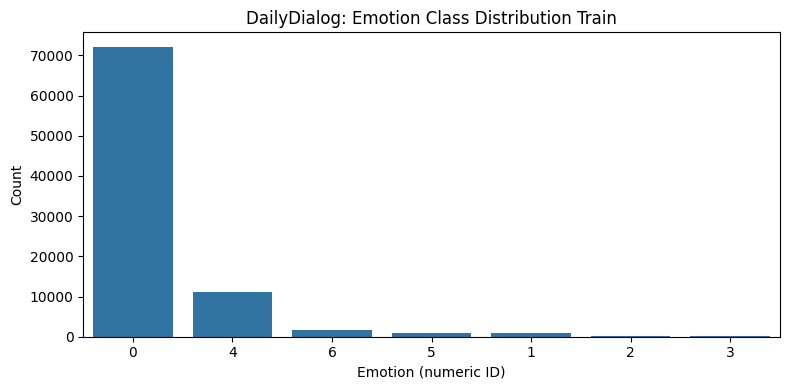

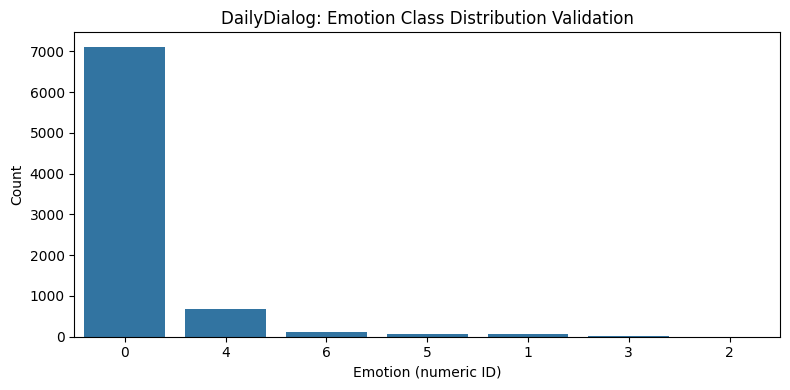

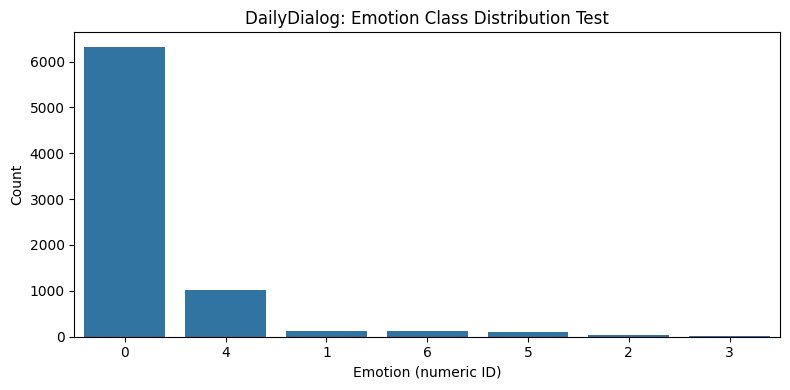

In [28]:
# Emotion distribution

plt.figure(figsize=(8,4))
order = dd_train["Emotion"].value_counts().index
sns.countplot(x="Emotion", data=dd_train, order=order)
plt.title("DailyDialog: Emotion Class Distribution Train")
plt.xlabel("Emotion (numeric ID)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
order = dd_val["Emotion"].value_counts().index
sns.countplot(x="Emotion", data=dd_val, order=order)
plt.title("DailyDialog: Emotion Class Distribution Validation")
plt.xlabel("Emotion (numeric ID)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
order = dd_test["Emotion"].value_counts().index
sns.countplot(x="Emotion", data=dd_test, order=order)
plt.title("DailyDialog: Emotion Class Distribution Test")
plt.xlabel("Emotion (numeric ID)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

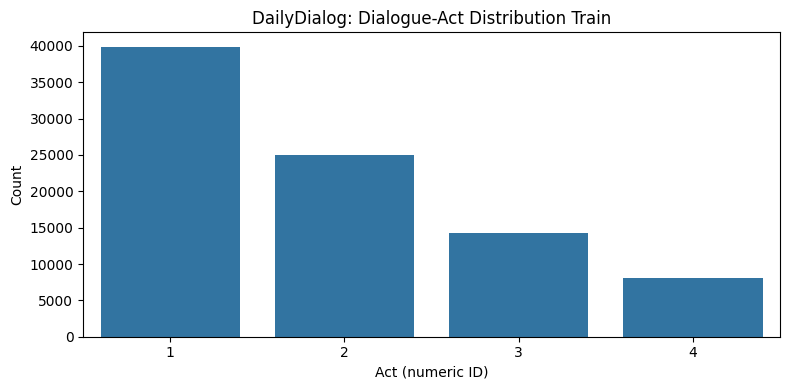

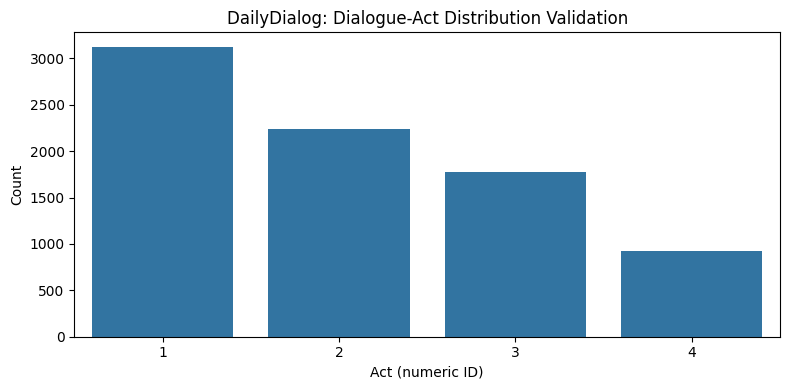

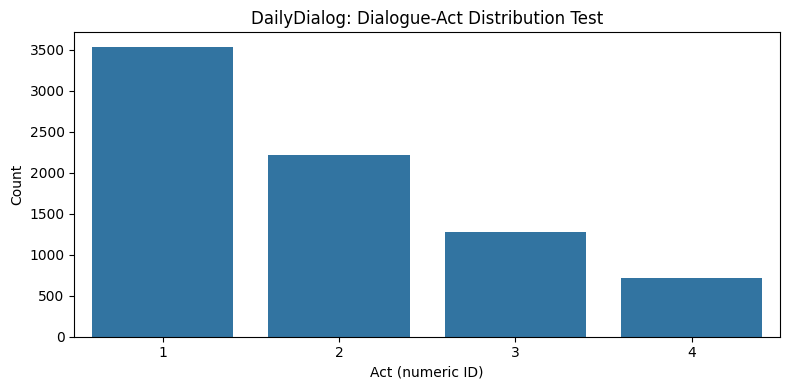

In [29]:
# Dialogue-Act distribution

plt.figure(figsize=(8,4))
order = dd_train["Act"].value_counts().index
sns.countplot(x="Act", data=dd_train, order=order)
plt.title("DailyDialog: Dialogue-Act Distribution Train")
plt.xlabel("Act (numeric ID)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
order = dd_val["Act"].value_counts().index
sns.countplot(x="Act", data=dd_val, order=order)
plt.title("DailyDialog: Dialogue-Act Distribution Validation")
plt.xlabel("Act (numeric ID)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
order = dd_test["Act"].value_counts().index
sns.countplot(x="Act", data=dd_test, order=order)
plt.title("DailyDialog: Dialogue-Act Distribution Test")
plt.xlabel("Act (numeric ID)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

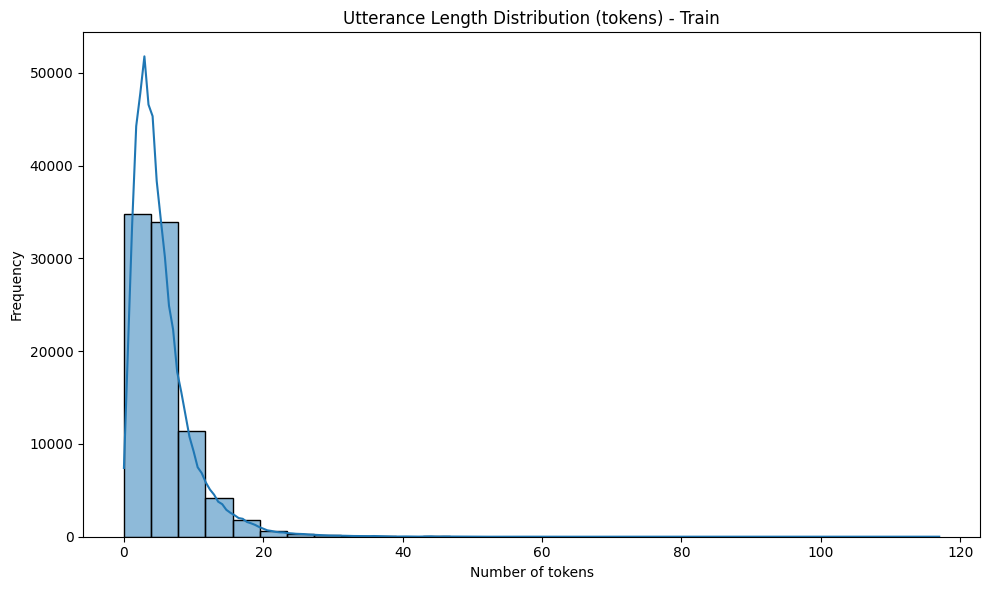

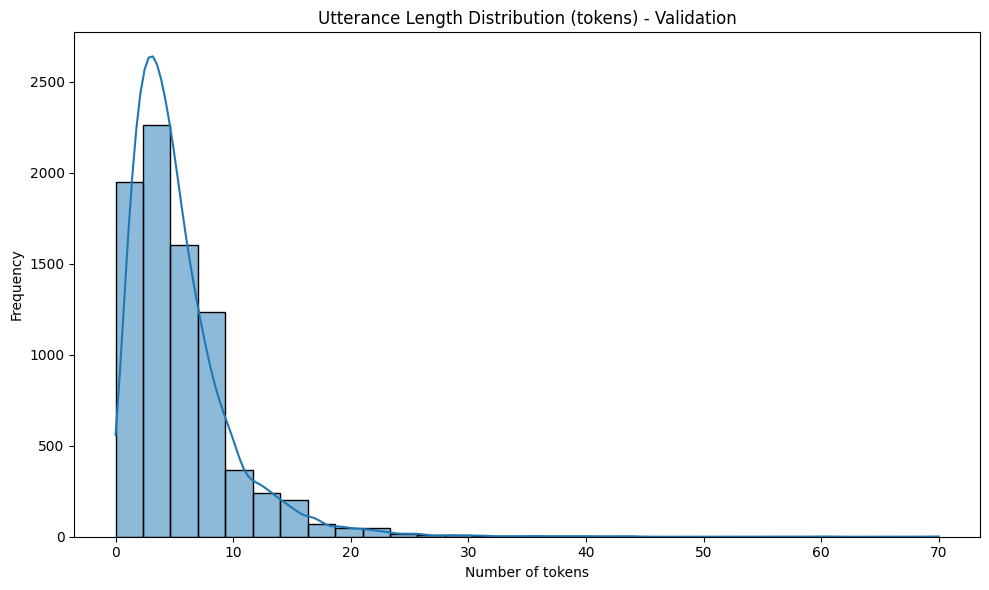

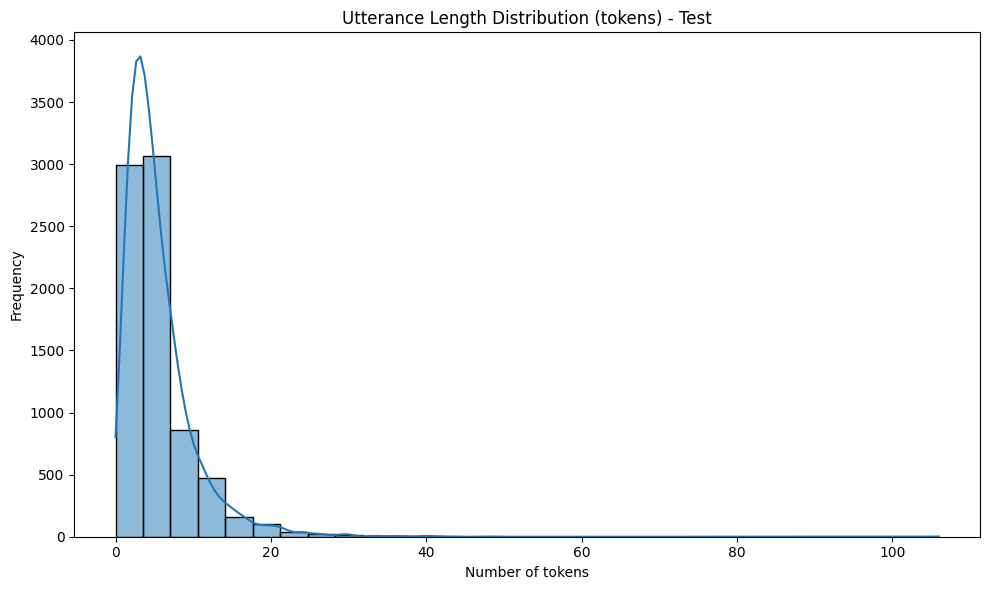

In [30]:
# Utterance length distribution

# compute token counts
dd_train["Length"] = dd_train["Tokens"].apply(lambda x: len(x) if isinstance(x, list) else 0)

plt.figure(figsize=(10,6))
sns.histplot(dd_train["Length"], bins=30, kde=True)
plt.title("Utterance Length Distribution (tokens) - Train")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# compute token counts
dd_val["Length"] = dd_val["Tokens"].apply(lambda x: len(x) if isinstance(x, list) else 0)

plt.figure(figsize=(10,6))
sns.histplot(dd_val["Length"], bins=30, kde=True)
plt.title("Utterance Length Distribution (tokens) - Validation")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# compute token counts
dd_test["Length"] = dd_test["Tokens"].apply(lambda x: len(x) if isinstance(x, list) else 0)

plt.figure(figsize=(10,6))
sns.histplot(dd_test["Length"], bins=30, kde=True)
plt.title("Utterance Length Distribution (tokens) - Test")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [31]:
# Top token frequencies

all_tokens_train = [token for tokens in dd_train["Tokens"] if isinstance(tokens, list) for token in tokens]
freq_train = Counter(all_tokens_train)
top10_train = freq_train.most_common(10)
top10_train_df = pd.DataFrame(top10_train, columns=["token", "count"])
print("Top 10 train dataset tokens:")
print(top10_train_df.to_markdown(index=False))

print()
all_tokens_val = [token for tokens in dd_val["Tokens"] if isinstance(tokens, list) for token in tokens]
freq_val = Counter(all_tokens_val)
top10_val = freq_val.most_common(10)
top10_val_df = pd.DataFrame(top10_val, columns=["token", "count"])
print("Top 10 validation dataset tokens:")
print(top10_val_df.to_markdown(index=False))

print()
all_tokens_test = [token for tokens in dd_test["Tokens"] if isinstance(tokens, list) for token in tokens]
freq_test = Counter(all_tokens_test)
top10_test = freq_test.most_common(10)
top10_test_df = pd.DataFrame(top10_test, columns=["token", "count"])
print("Top 10 test dataset tokens:")
print(top10_test_df.to_markdown(index=False))

Top 10 train dataset tokens:
| token   |   count |
|:--------|--------:|
| like    |    6177 |
| yes     |    5208 |
| well    |    4366 |
| think   |    4034 |
| im      |    4013 |
| good    |    3988 |
| know    |    3794 |
| get     |    3763 |
| would   |    3518 |
| go      |    3497 |

Top 10 validation dataset tokens:
| token   |   count |
|:--------|--------:|
| yes     |     555 |
| like    |     544 |
| well    |     404 |
| im      |     380 |
| would   |     366 |
| good    |     363 |
| please  |     347 |
| get     |     343 |
| one     |     332 |
| right   |     328 |

Top 10 test dataset tokens:
| token   |   count |
|:--------|--------:|
| like    |     499 |
| yes     |     475 |
| well    |     387 |
| im      |     382 |
| know    |     372 |
| think   |     367 |
| good    |     363 |
| go      |     335 |
| get     |     325 |
| would   |     312 |


#### Saving the dataset

In [32]:
# Save the preprocessed dataset
os.makedirs("../data/processed", exist_ok=True)

dd_train.to_csv("../data/processed/dd_train_tokenized.csv")
dd_val.to_csv("../data/processed/dd_val_tokenized.csv")
dd_test.to_csv("../data/processed/dd_test_tokenized.csv")

print("DailyDialog Datasets saved as .csv")

dd_train.to_pickle("../data/processed/dd_train_tokenized.pkl")
dd_val.to_pickle("../data/processed/dd_val_tokenized.pkl")
dd_test.to_pickle("../data/processed/dd_test_tokenized.pkl")

print("DailyDialog Datasets saved as .pkl")

DailyDialog Datasets saved as .csv
DailyDialog Datasets saved as .pkl


# Creating the vocabulary

In [33]:
dd_train = pd.read_pickle("../data/processed/dd_train_tokenized.pkl")
meld_train = pd.read_pickle("../data/processed/meld_train_tokenized.pkl")

In [34]:
def build_vocab(token_lists, min_freq=2):
    counter = Counter()
    for tokens in token_lists:
        if isinstance(tokens, list):
            counter.update(tokens)

    vocab = {
        "<PAD>": 0,
        "<UNK>": 1
    }

    for word, freq in counter.items():
        if freq >= min_freq:
            vocab[word] = len(vocab)

    return vocab

## Vocabulary creation with MELD dataset

In [35]:
# Merge token lists from both datasets
tokens = meld_train["tokens"].tolist()

In [36]:
vocab_meld = build_vocab(tokens, min_freq=2)
print(f"Vocab size: {len(vocab_meld)}")

os.makedirs("../data/processed", exist_ok=True)

with open("../data/processed/vocab_meld.pkl", "wb") as f:
    pickle.dump(vocab_meld, f)

print("Vocabulary saved as vocab_meld.pkl")

Vocab size: 2513
Vocabulary saved as vocab_meld.pkl


## Vocabulary creation with DailyDialog dataset

In [37]:
# Fetch the tokens from DailyDialog dataset
tokens = dd_train["Tokens"].tolist()

In [38]:
vocab_dd = build_vocab(tokens, min_freq=2)
print(f"Vocab size: {len(vocab_dd)}")

os.makedirs("../data/processed", exist_ok=True)

with open("../data/processed/vocab.pkl", "wb") as f:
    pickle.dump(vocab_dd, f)

print("Vocabulary saved as vocab.pkl")

Vocab size: 10948
Vocabulary saved as vocab.pkl
